Here are some examples for how to use some of the functionality of Muldoon.

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from numpy.random import normal

from muldoon.met_timeseries import MetTimeseries
from muldoon.utils import modified_lorentzian, fit_vortex, write_out_plot_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Create time-series
time = np.linspace(-10, 10, 1000)
baseline = 0.
slope = 1.
t0 = 0.
DeltaP = 1.
Gamma = 0.5

right_answer = np.array([baseline, slope, t0, DeltaP, Gamma])

profile = modified_lorentzian(time, baseline, slope, t0, DeltaP, Gamma) + normal(scale=slope/20., size=len(time))
mt = MetTimeseries(time, profile)

0.051863948406583066
True


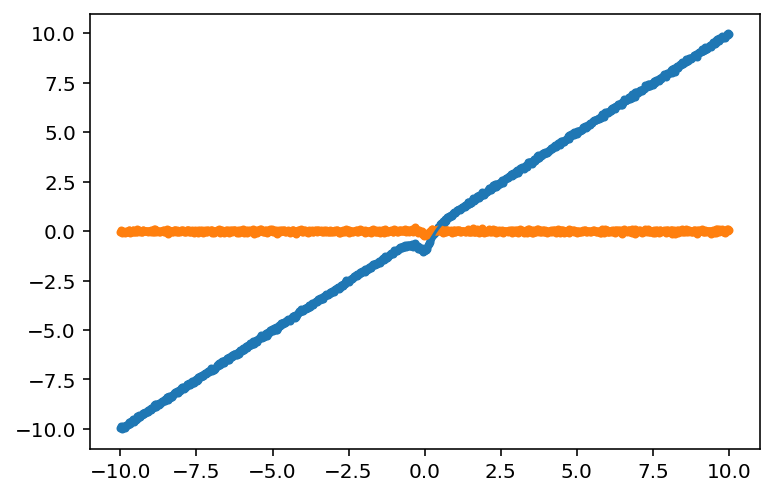

In [5]:
# Detrend
window_size = Gamma
detrended_pressure = mt.detrend_pressure_timeseries(window_size)
print(np.std(mt.detrended_pressure))
print(np.isclose(np.std(mt.detrended_pressure), 0.1, atol=0.1))

plt.scatter(mt.time, mt.pressure, marker='.')
plt.scatter(mt.time, mt.detrended_pressure, marker='.')
plt.plot(mt.time, mt.pressure_trend)

In [12]:
# Test time-series write-out
write_str = write_out_plot_data(mt.time, mt.pressure, yerr=np.std(mt.pressure)*np.ones_like(mt.pressure),
                                x_label="Time", y_label="Pressure", test_mode=True)
print(write_str);

# Time, Pressure, Pressure_err
-10, -9.9767, 5.78123
-9.97998, -9.85718, 5.78123
-9.95996, -9.99798, 5.78123
-9.93994, -9.90581, 5.78123
-9.91992, -9.94487, 5.78123
-9.8999, -9.86694, 5.78123
-9.87988, -9.89753, 5.78123
-9.85986, -9.93951, 5.78123
-9.83984, -9.87178, 5.78123
-9.81982, -9.80282, 5.78123
-9.7998, -9.83695, 5.78123
-9.77978, -9.82335, 5.78123
-9.75976, -9.82606, 5.78123
-9.73974, -9.73923, 5.78123
-9.71972, -9.68874, 5.78123
-9.6997, -9.66064, 5.78123
-9.67968, -9.7749, 5.78123
-9.65966, -9.65417, 5.78123
-9.63964, -9.62363, 5.78123
-9.61962, -9.67243, 5.78123
-9.5996, -9.55463, 5.78123
-9.57958, -9.51652, 5.78123
-9.55956, -9.63136, 5.78123
-9.53954, -9.57183, 5.78123
-9.51952, -9.50539, 5.78123
-9.4995, -9.5583, 5.78123
-9.47948, -9.48206, 5.78123
-9.45946, -9.36323, 5.78123
-9.43944, -9.48228, 5.78123
-9.41942, -9.42703, 5.78123
-9.3994, -9.37721, 5.78123
-9.37938, -9.31695, 5.78123
-9.35936, -9.33791, 5.78123
-9.33934, -9.40422, 5.78123
-9.31932, -9.301, 5.78123
-9.29

In [18]:
from scipy.stats import mode
print(mt.time[1:] - mt.time[0:-1])
print(mode(mt.time[1:] - mt.time[0:-1]).mode[0])

[0.02002002 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002
 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002
 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002
 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002
 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002
 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002
 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002
 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002
 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002
 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002
 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002
 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002
 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002
 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002
 0.02002002 0.02002002 0.02002002 0.02002002 0.02002002 0.0200

9.54602554571874 0.05005005005005003 0.040040040040040026
0.05005005005005003


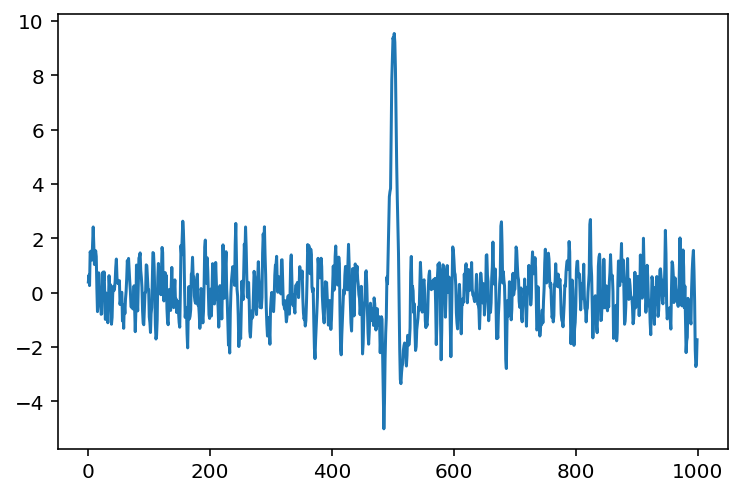

In [13]:
# plt.plot(mt.time, profile)
conv = mt.apply_lorentzian_matched_filter(2.*mt.sampling, 1./np.pi)
mx_ind = np.argmax(mt.convolution)

print(mt.convolution[mx_ind], np.abs(mt.time[mx_ind]), 2.*mt.sampling)
# plt.plot(mt.time, mt.convolution)
# plt.plot(mt.time, profile)
plt.plot(mt.convolution)
# Make sure convolution returns a strong peak at the right time
print((np.abs(mt.time[mx_ind])))

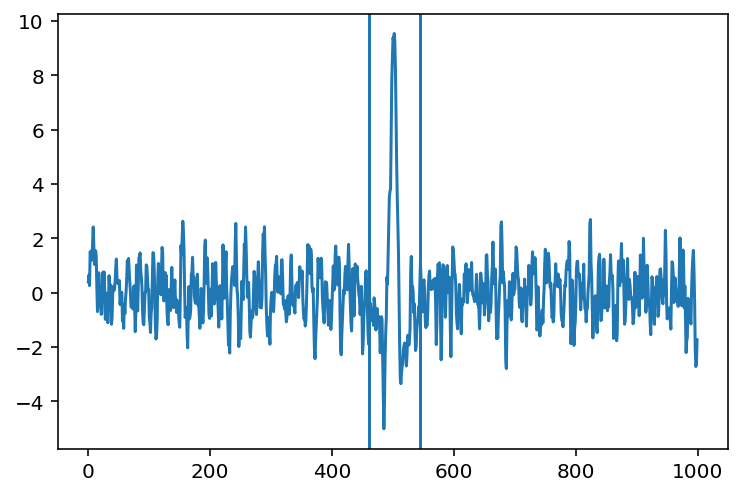

In [14]:
# Test find_vortices - Set the threshold very low to make sure the right peak is actually at the top of the list
vortices = mt.find_vortices(detection_threshold=2)
plt.plot(mt.convolution)
plt.axvline(mt.peak_indices[0] - 3.*mt.peak_widths[0])
plt.axvline(mt.peak_indices[0] + 3.*mt.peak_widths[0])

# Make sure the max peak in the convolution is the right one
assert(mt.time[mt.peak_indices[0]] < Gamma)

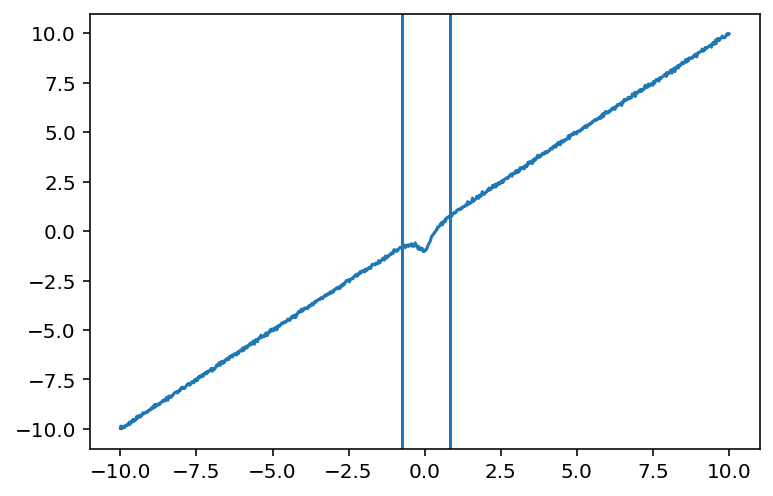

In [15]:
# Test find_vortices
vortices = mt.find_vortices(detection_threshold=7)
plt.plot(mt.time, mt.pressure)
plt.axvline(mt.time[mt.peak_indices[0] - 3*int(mt.peak_widths[0])])
plt.axvline(mt.time[mt.peak_indices[0] + 3*int(mt.peak_widths[0])])

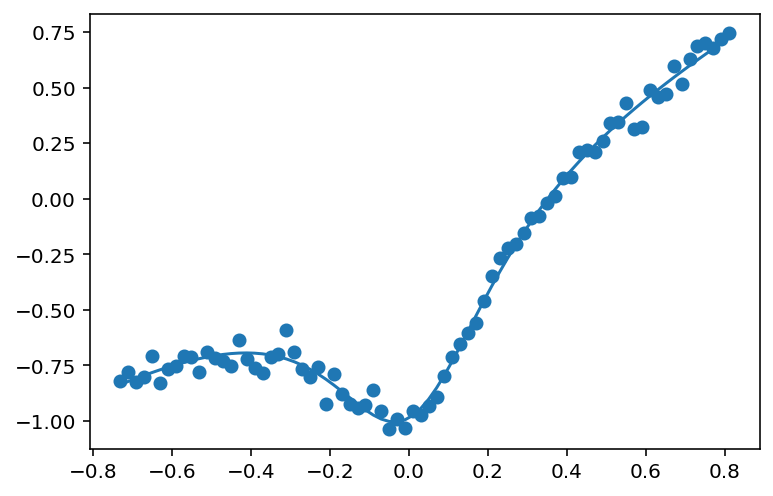

In [16]:
plt.scatter(vortices[0]["time"], vortices[0]["pressure"])

# Test vortex fit
old_popt, old_unc = fit_vortex(vortices[0], [0., 1., 0., 1., 0.01], 
                          [[-1, -1, np.min(vortices[0]["time"]), 0, 0],
                           [1, 1, np.max(vortices[0]["time"]), 2, 1]], sigma=vortices[0]["pressure_scatter"])
assert(np.max(np.abs(old_popt - right_answer)/old_unc) < 3.)

plt.plot(vortices[0]["time"], modified_lorentzian(vortices[0]["time"], *old_popt))

In [17]:
# baseline, slope, t0, deltaP, Gamma
# print(old_popt)

init_params = mt._determine_init_params(vortices[0])
bounds = mt._determine_bounds(vortices[0], init_params)
popt, unc = fit_vortex(vortices[0], init_params, bounds, sigma=vortices[0]["pressure_scatter"])
assert(np.max(np.abs(popt - right_answer)/unc) < 3.)

print(np.max(np.abs(popt - right_answer)/unc))
# print((popt - old_popt)/np.sqrt(unc**2 + old_unc**2))

# plt.scatter(vortices[0]["time"], vortices[0]["pressure"])
# plt.plot(vortices[0]["time"], modified_lorentzian(vortices[0]["time"], *popt))

1.4792320916573598


In [29]:
# Test fit all vortices
popts, uncs = mt.fit_all_vortices()

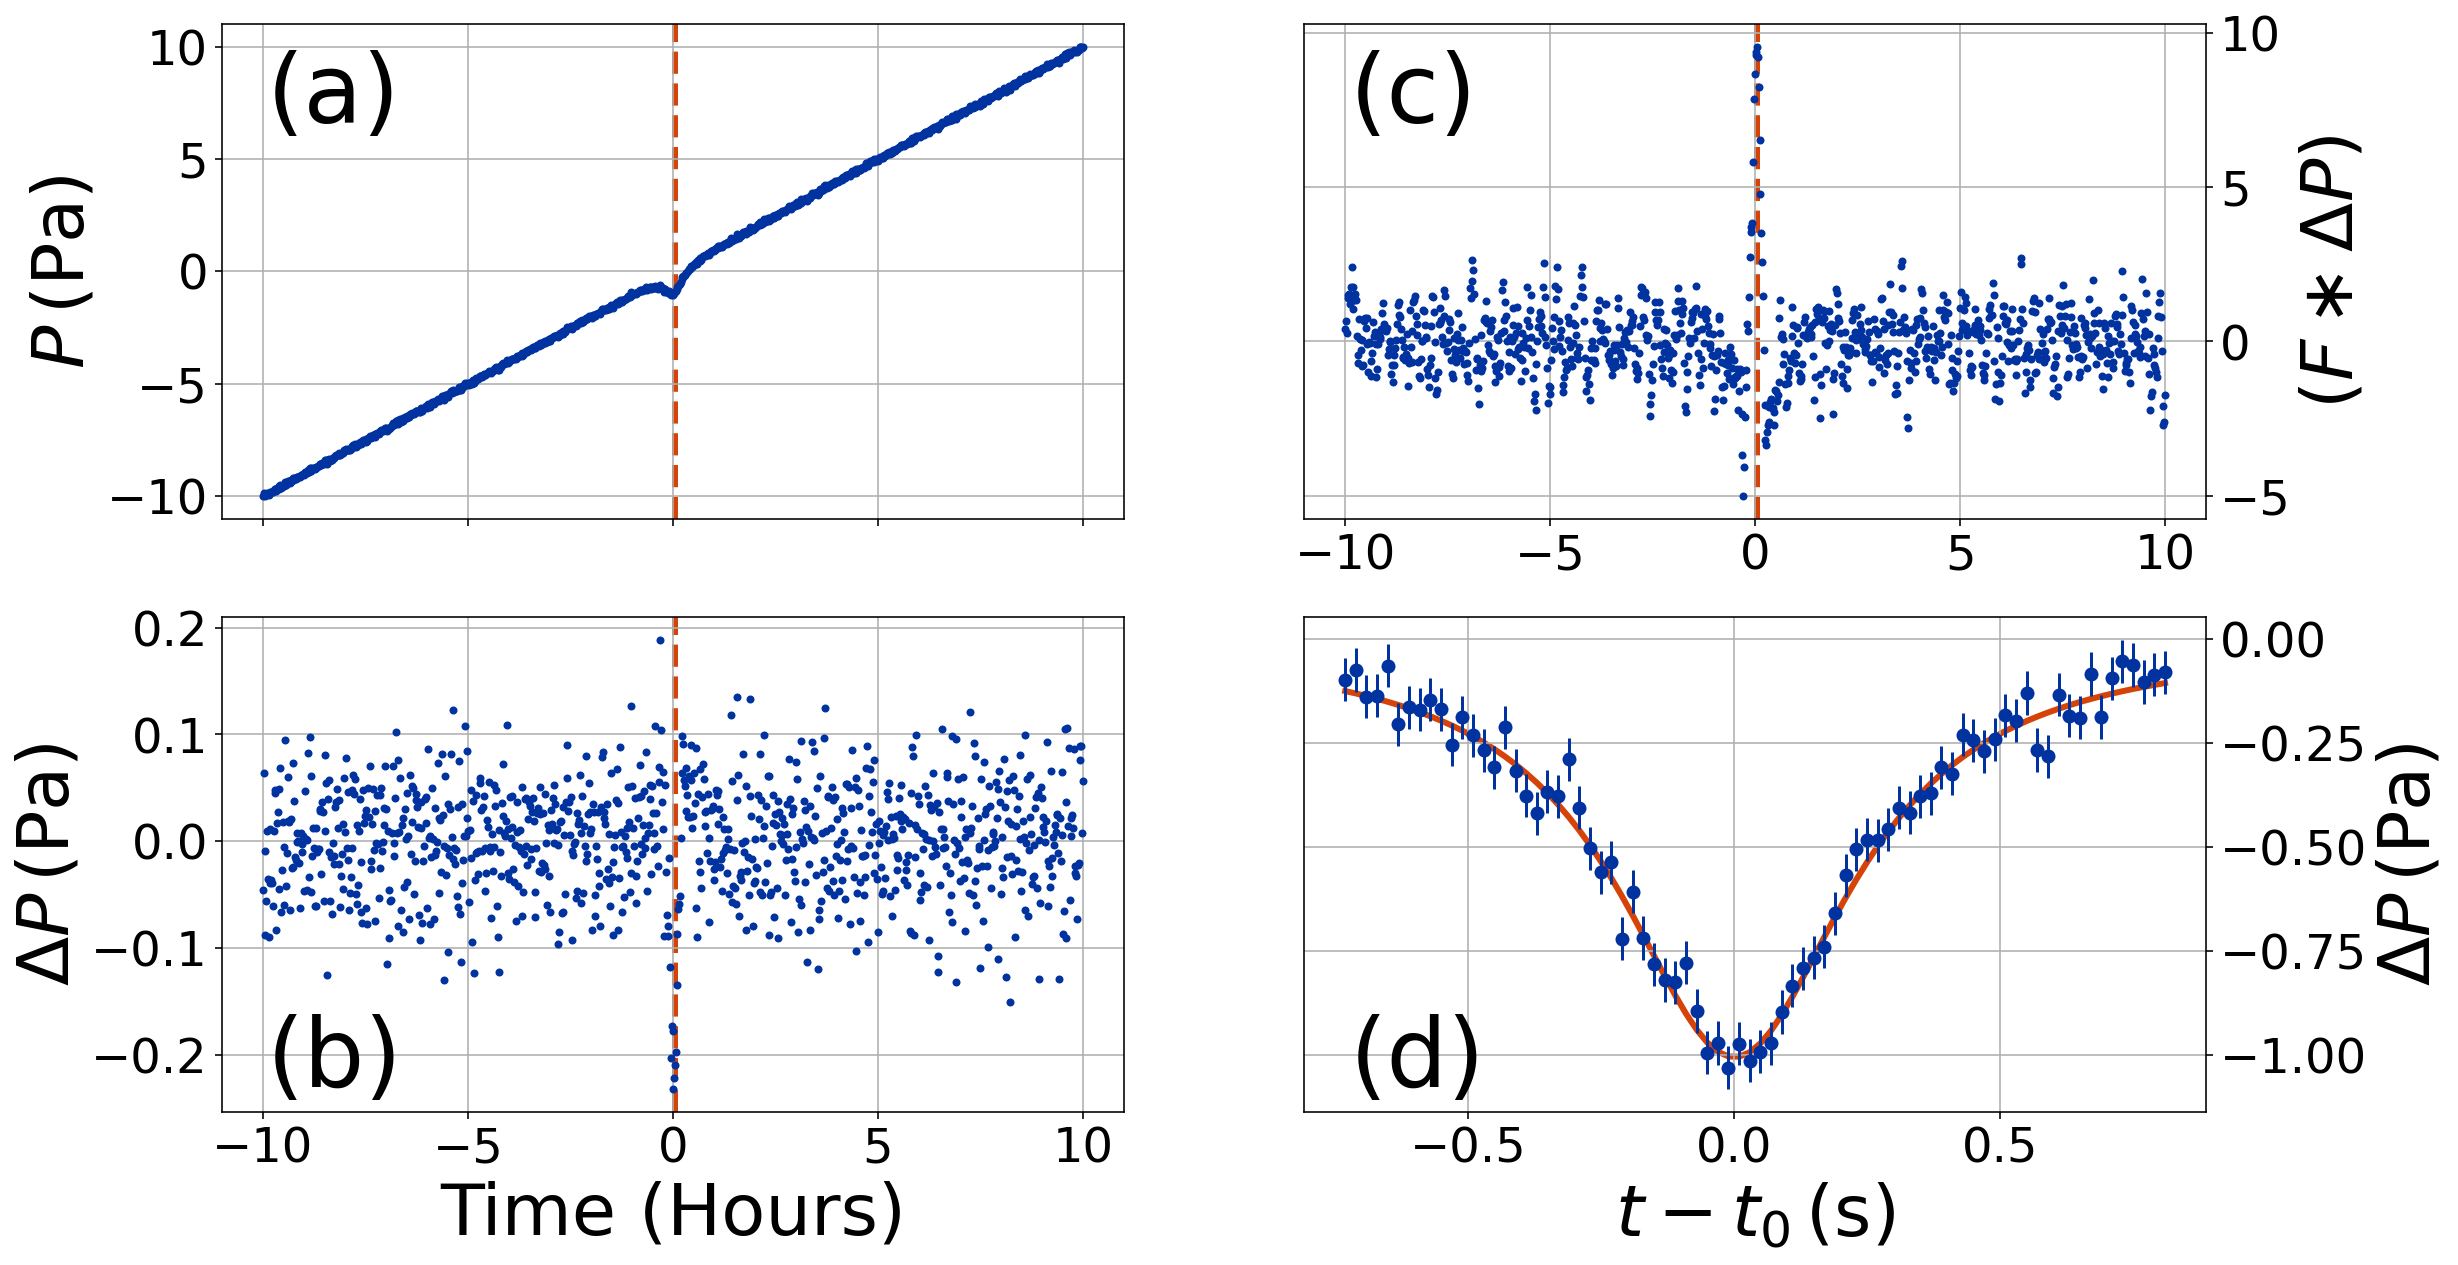

In [41]:
# Make plot showing how the data are conditioned and write out the data in each panel
mt.make_conditioned_data_figure(write_filename="./test_");